# I. Missing Value(결측치)

NA : not abailable

NAN : not a number
1. 결측치 확인
2. 뺄건지 넣을 건지

데이터 정제, domain knowledge 가 있어야 뺄건지 넣을 건지 알 수 있다.


> ## 1) 실습용 'titanic' 데이터셋

* 'age' 및 'deck' 열(Column)에서 결측치(NaN) 확인

In [1]:
import seaborn as sns
DF = sns.load_dataset('titanic')

DF.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


* 'titanic' Dataset Information

In [2]:
DF.shape

(891, 15)

In [3]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


> ## 2) 결측치 확인

* .value_counts(dropna = False)
 - 결측치(NaN)를 포함하여 결과 출력

In [4]:
DF['deck'].value_counts(dropna = False)

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

* .isnull( )
 - 결측치(NaN)를 'True'로 출력

In [5]:
DF.head(10).isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
5,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


* 각 열(Column)별로 결측치 개수 확인
* .isnull( ).sum(axis = 0)
 - axis = 0 : 행(Row)
 - axis = 1 : 열(Column)

In [6]:
DF.isnull().sum(axis = 0)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

* .notnull( )
 - 결측치(NaN)를 'False'로 출력

In [7]:
DF.head(10).notnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
5,True,True,True,False,True,True,True,True,True,True,True,False,True,True,True
6,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
8,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
9,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True


> ## 3) 결측치 삭제

* 각 열(Column)별로 결측치 개수 확인

In [8]:
DF.isnull().sum(axis = 0)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

* 결측치가 300개 이상인 열(Column) 삭제
 - .dropna(thresh = 300, axis = 1)
 - 'deck' 열 삭제

In [9]:
DF.dropna(thresh = 300, axis = 1).shape 

(891, 14)

* 결측치가 한 개라도 있는 행(Row) 삭제
 - .dropna(subset = ['age'], how = 'any', axis = 0)

In [10]:
DF.shape

(891, 15)

In [11]:
DF.dropna(subset = ['age'], how = 'any', axis = 0).shape # any : 결측치가 한개라도 있는 경우

(714, 15)

> ## 4) 격측치 치환

* 연속형 데이터 치환
 - 'age'의 결측치를 평균값으로 치환
 - .fillna(int(DF['age'].mean(axis = 0)), inplace = True)

In [12]:
DF['age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

In [13]:
DF['age'].fillna(int(DF['age'].mean(axis = 0)), inplace = True)

In [14]:
DF['age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    29.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

* 명목형 데이터 치환
 - 'embark_town'의 결측치를 최빈값으로 치환
 - .fillna(most_freq, inplace = True)

In [15]:
DF['embark_town'][825:830]

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
Name: embark_town, dtype: object

In [16]:
most_freq = DF['embark_town'].value_counts(dropna = True).idxmax()

most_freq

'Southampton'

In [17]:
DF['embark_town'].fillna(most_freq, inplace = True)

In [18]:
DF.shape

(891, 15)

In [19]:
DF['embark_town'][825:830]

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829    Southampton
Name: embark_town, dtype: object

* 결측치 치환 with 'ffill'
 - 이전 데이터포인트로 치환
 - .fillna(method = 'ffill', inplace = True)

In [20]:
DF = sns.load_dataset('titanic')

DF['embark_town'][828:831]

828    Queenstown
829           NaN
830     Cherbourg
Name: embark_town, dtype: object

In [21]:
DF['embark_town'].fillna(method = 'ffill', inplace = True)

DF['embark_town'][828:831]

828    Queenstown
829    Queenstown
830     Cherbourg
Name: embark_town, dtype: object

* 결측치 치환 with 'bfill'
 - 다음 데이터포인트로 치환
 - .fillna(method = 'bfill', inplace = True)

In [22]:
DF = sns.load_dataset('titanic')

DF['embark_town'][828:831]

828    Queenstown
829           NaN
830     Cherbourg
Name: embark_town, dtype: object

In [23]:
DF['embark_town'].fillna(method = 'bfill', inplace = True)

DF['embark_town'][828:831]

828    Queenstown
829     Cherbourg
830     Cherbourg
Name: embark_town, dtype: object

# II. apply( )

* 시리즈(Series)나 데이터프레임(DataFrame) 구조에 함수를 매핑
  - 시리즈=컬럼=열

> ## 1) 실습용 'titanic' 데이터셋

In [24]:
titanic = sns.load_dataset('titanic')
titanic.head()
print(titanic.loc[1])

survived               1
pclass                 1
sex               female
age                   38
sibsp                  1
parch                  0
fare             71.2833
embarked               C
class              First
who                woman
adult_male         False
deck                   C
embark_town    Cherbourg
alive                yes
alone              False
Name: 1, dtype: object


In [25]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

DF = titanic.loc[:, ['age','fare']].head(5)
DF

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


> ## 2) apply(axis = 0)

* sum( ) 함수를 행(Row)으로 매핑

In [26]:
DF.apply(sum, axis = 0)

age     156.0000
fare    147.6083
dtype: float64

> ## 3) apply(axis = 1)

* sum( ) 함수를 열(Column)로 매핑

In [27]:
DF.apply(sum, axis = 1)

0     29.2500
1    109.2833
2     33.9250
3     88.1000
4     43.0500
dtype: float64

In [28]:
DF.apply(sum)

age     156.0000
fare    147.6083
dtype: float64

> ## 4) etc

* map( ) & apply( )
 - map( ) 함수는 시리즈(Series)에만 적용 가능
 - apply( ) 는 dataframe에 적용

In [29]:
DF['age'].map(lambda x: x + 100)

0    122.0
1    138.0
2    126.0
3    135.0
4    135.0
Name: age, dtype: float64

In [30]:
DF['age'].apply(lambda x: x + 100)

0    122.0
1    138.0
2    126.0
3    135.0
4    135.0
Name: age, dtype: float64

* applymap( )
  - applymap( ) 함수는 데이터프레임에만 적용 가능
  

In [31]:
DF.applymap(lambda x: x + 100)

,age,fare
0,122.0,107.2500
1,138.0,171.2833
2,126.0,107.9250
3,135.0,153.1000
4,135.0,108.0500


In [32]:
DF.apply(lambda x: x + 100)

,age,fare
0,122.0,107.2500
1,138.0,171.2833
2,126.0,107.9250
3,135.0,153.1000
4,135.0,108.0500


* pipe( ) apply랑 동일하게 적용

In [33]:
DF['age'].pipe(lambda x: x + 100)

0    122.0
1    138.0
2    126.0
3    135.0
4    135.0
Name: age, dtype: float64

In [34]:
DF.pipe(lambda x: x + 100)

,age,fare
0,122.0,107.2500
1,138.0,171.2833
2,126.0,107.9250
3,135.0,153.1000
4,135.0,108.0500


# III. Filtering(필터링)

> ## 1) 실습용 'titanic' 데이터셋

In [35]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic
# titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


> ## 2) 'age'가 10살 이상이면서 20살 미만

In [36]:
Filter_1 = (titanic.age >= 10) & (titanic.age < 20)

titanic.loc[Filter_1, :].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
22,1,3,female,15.0,0,0,8.0292,Q,Third,child,False,NaN,Queenstown,yes,True
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
38,0,3,female,18.0,2,0,18.0000,S,Third,woman,False,NaN,Southampton,no,False


In [37]:
titanic.loc[(titanic.age >= 10) & (titanic.age < 20), :].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
22,1,3,female,15.0,0,0,8.0292,Q,Third,child,False,NaN,Queenstown,yes,True
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
38,0,3,female,18.0,2,0,18.0000,S,Third,woman,False,NaN,Southampton,no,False


> ## 3) 'age'가 10살 미만이면서 'sex'이 여자

In [38]:
Filter_2 = (titanic.age < 10) & (titanic.sex == 'female')

titanic.loc[Filter_2, :].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
24,0,3,female,8.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
43,1,2,female,3.0,1,2,41.5792,C,Second,child,False,NaN,Cherbourg,yes,False
58,1,2,female,5.0,1,2,27.7500,S,Second,child,False,NaN,Southampton,yes,False
119,0,3,female,2.0,4,2,31.2750,S,Third,child,False,NaN,Southampton,no,False


> ## 4) 'age'가 10살 미만 또는 60살 이상

* 'age', 'sex', 'alone' 열만 출력

In [39]:
Filter_3 = (titanic.age < 10) | (titanic.age >= 60)

titanic.loc[Filter_3, ['age','sex','alone']].head()

,age,sex,alone
7,2.0,male,False
10,4.0,female,False
16,2.0,male,False
24,8.0,female,False
33,66.0,male,True


> ## 5) isin( )

* 'sibsp'에 3 또는 4 또는 5를 포함
 - 'sibsp == 3 | sibsp == 4 | sibsp == 5'

In [40]:
Filter_isin = titanic['sibsp'].isin([3, 4, 5])

titanic[Filter_isin].head(6)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
24,0,3,female,8.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
50,0,3,male,7.0,4,1,39.6875,S,Third,child,False,NaN,Southampton,no,False
59,0,3,male,11.0,5,2,46.9000,S,Third,child,False,NaN,Southampton,no,False


# IV. 데이터프레임 합치기


> ## 1) 데이터프레임 DF1, DF2 생성

In [41]:
import pandas as pd

DF1 = pd.DataFrame({'HP': ['hp0', 'hp1', 'hp2', 'hp3'],
                    'IBM': ['ibm0', 'ibm1', 'ibm2', 'ibm3'],
                    'DELL': ['dell0', 'dell1', 'dell2', 'dell3']},
                    index = [0, 1, 2, 3])


DF1

,HP,IBM,DELL
0,hp0,ibm0,dell0
1,hp1,ibm1,dell1
2,hp2,ibm2,dell2
3,hp3,ibm3,dell3


In [42]:
DF2 = pd.DataFrame({'HP': ['hp2', 'hp3', 'hp4', 'hp5'],
                    'IBM': ['ibm2', 'ibm3', 'ibm4', 'ibm5'],
                    'DELL': ['dell2', 'dell3', 'dell4', 'dell5'],
                    'ASUS': ['asus2', 'asus3', 'asus4', 'asus5']},
                    index = [2, 3, 4, 5])

DF2

,HP,IBM,DELL,ASUS
2,hp2,ibm2,dell2,asus2
3,hp3,ibm3,dell3,asus3
4,hp4,ibm4,dell4,asus4
5,hp5,ibm5,dell5,asus5


> ## 2) concat( )

* 행기준 : axis = 0

In [43]:
pd.concat([DF1, DF2], axis = 0)

,HP,IBM,DELL,ASUS
0,hp0,ibm0,dell0,NaN
1,hp1,ibm1,dell1,NaN
2,hp2,ibm2,dell2,NaN
3,hp3,ibm3,dell3,NaN
2,hp2,ibm2,dell2,asus2
3,hp3,ibm3,dell3,asus3
4,hp4,ibm4,dell4,asus4
5,hp5,ibm5,dell5,asus5


* ignore_index = True

In [44]:
pd.concat([DF1, DF2], axis = 0, ignore_index = True)

,HP,IBM,DELL,ASUS
0,hp0,ibm0,dell0,NaN
1,hp1,ibm1,dell1,NaN
2,hp2,ibm2,dell2,NaN
3,hp3,ibm3,dell3,NaN
4,hp2,ibm2,dell2,asus2
5,hp3,ibm3,dell3,asus3
6,hp4,ibm4,dell4,asus4
7,hp5,ibm5,dell5,asus5


* 열기준 : axis = 1, join = 'inner'
 - 'inner' : Intersection (교집합)
 

In [45]:
pd.concat([DF1, DF2], axis = 1, join = 'inner')

,HP,IBM,DELL,HP,IBM,DELL,ASUS
2,hp2,ibm2,dell2,hp2,ibm2,dell2,asus2
3,hp3,ibm3,dell3,hp3,ibm3,dell3,asus3


* 열기준 : axis = 1, join = 'outer'
 - 'outer' : Union (합집합)

In [46]:
pd.concat([DF1, DF2], axis = 1, join = 'outer')

,HP,IBM,DELL,HP,IBM,DELL,ASUS
0,hp0,ibm0,dell0,NaN,NaN,NaN,NaN
1,hp1,ibm1,dell1,NaN,NaN,NaN,NaN
2,hp2,ibm2,dell2,hp2,ibm2,dell2,asus2
3,hp3,ibm3,dell3,hp3,ibm3,dell3,asus3
4,NaN,NaN,NaN,hp4,ibm4,dell4,asus4
5,NaN,NaN,NaN,hp5,ibm5,dell5,asus5


> ## 3) merge( )

* how = 'inner'

In [47]:
#@title
pd.merge(DF1, DF2)

,HP,IBM,DELL,ASUS
0,hp2,ibm2,dell2,asus2
1,hp3,ibm3,dell3,asus3


* how = 'outer'

In [48]:
pd.merge(DF1, DF2, how = 'outer')

,HP,IBM,DELL,ASUS
0,hp0,ibm0,dell0,NaN
1,hp1,ibm1,dell1,NaN
2,hp2,ibm2,dell2,asus2
3,hp3,ibm3,dell3,asus3
4,hp4,ibm4,dell4,asus4
5,hp5,ibm5,dell5,asus5


* how = 'left'
 - 왼쪽 데이터프레임의 키(Key)만 사용 'left-outer'

In [49]:
pd.merge(DF1, DF2, how = 'left')

,HP,IBM,DELL,ASUS
0,hp0,ibm0,dell0,NaN
1,hp1,ibm1,dell1,NaN
2,hp2,ibm2,dell2,asus2
3,hp3,ibm3,dell3,asus3


* how = 'right'
 - 오른쪽 데이터프레임의 키(Key)만 사용 'right-outer'

In [50]:
pd.merge(DF1, DF2, how = 'right')

,HP,IBM,DELL,ASUS
0,hp2,ibm2,dell2,asus2
1,hp3,ibm3,dell3,asus3
2,hp4,ibm4,dell4,asus4
3,hp5,ibm5,dell5,asus5


# V. 그룹 연산

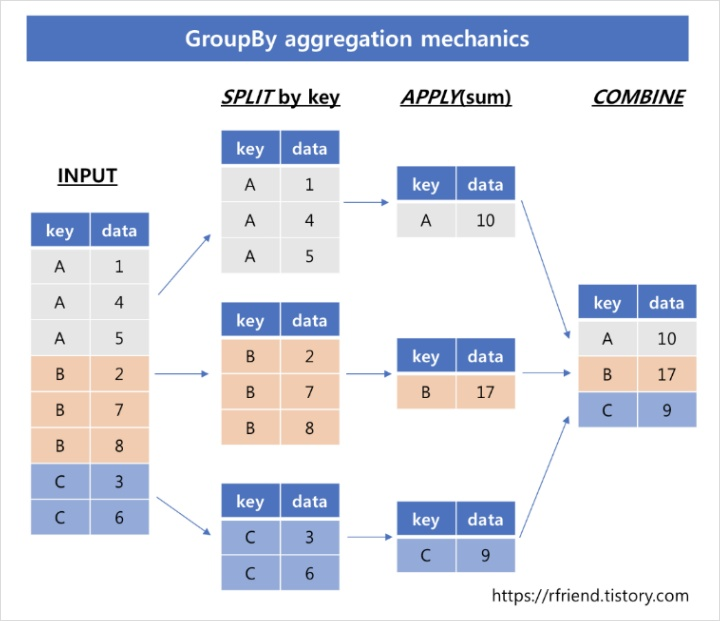

> ## 1) 실습용 'titanic' 데이터셋

In [51]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

DF = titanic.loc[:, ['age', 'sex', 'class', 'fare', 'survived']]

DF.head()

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0


> ## 2) groupby( )

* 'class' 기준의 DataFrameGroupBy 객체 생성

In [52]:
grouped = DF.groupby(['class'])

grouped

* groupby 결과 확인(3개 그룹)
 - 'First', 'Second', 'Third' 키별 3줄씩 출력
 - .get_group('Key_Name')

In [53]:
for key in ['First', 'Second', 'Third']:
  print(grouped.get_group(key).head(3))
  print('\n')

    age     sex  class     fare  survived
1  38.0  female  First  71.2833         1
3  35.0  female  First  53.1000         1
6  54.0    male  First  51.8625         0


     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
17   NaN    male  Second  13.0000         1


    age     sex  class   fare  survived
0  22.0    male  Third  7.250         0
2  26.0  female  Third  7.925         1
4  35.0    male  Third  8.050         0




* 3개 그룹별 평균('age', 'fare', 'survived')

In [54]:
grouped.get_group('First')

,age,sex,class,fare,survived
1,38.0,female,First,71.2833,1
3,35.0,female,First,53.1000,1
6,54.0,male,First,51.8625,0
11,58.0,female,First,26.5500,1
23,28.0,male,First,35.5000,1
...,...,...,...,...,...
871,47.0,female,First,52.5542,1
872,33.0,male,First,5.0000,0
879,56.0,female,First,83.1583,1
887,19.0,female,First,30.0000,1


In [55]:
grouped.mean()

,age,fare,survived
class,,,
First,38.233441,84.154687,0.629630
Second,29.877630,20.662183,0.472826
Third,25.140620,13.675550,0.242363


* 'Third' 키 그룹 정보 확인
 - .get_group('Third')

In [56]:
grouped.get_group('Third').head(3)

,age,sex,class,fare,survived
0,22.0,male,Third,7.250,0
2,26.0,female,Third,7.925,1
4,35.0,male,Third,8.050,0


* 두 개 키(Key) 사용하여 DataFrameGoupBy 객체 생성
 - 'class', 'sex' 키 적용

In [57]:
grouped_TWO = DF.groupby(['class', 'sex'])

grouped_TWO.head(1) #class 는 3개 sex는 2개 그래서 6개 나옴

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
6,54.0,male,First,51.8625,0
9,14.0,female,Second,30.0708,1
17,NaN,male,Second,13.0000,1


* groupby 결과 확인(6개 그룹)

In [58]:
for key, group in grouped_TWO:
  print('* key :', key)
  print('* number :', len(group))
  print(group.head(3))
  print('\n')

* key : ('First', 'female')
* number : 94
     age     sex  class     fare  survived
1   38.0  female  First  71.2833         1
3   35.0  female  First  53.1000         1
11  58.0  female  First  26.5500         1


* key : ('First', 'male')
* number : 122
     age   sex  class      fare  survived
6   54.0  male  First   51.8625         0
23  28.0  male  First   35.5000         1
27  19.0  male  First  263.0000         0


* key : ('Second', 'female')
* number : 76
     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
41  27.0  female  Second  21.0000         0


* key : ('Second', 'male')
* number : 108
     age   sex   class  fare  survived
17   NaN  male  Second  13.0         1
20  35.0  male  Second  26.0         0
21  34.0  male  Second  13.0         1


* key : ('Third', 'female')
* number : 144
     age     sex  class     fare  survived
2   26.0  female  Third   7.9250         1
8   27.0  female  Third

* 6개 그룹별 평균('age', 'fare', 'survived')

In [59]:
grouped_TWO.mean()

age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447

* ('First', 'female') 키 그룹 정보 확인
 - .get_group(('First', 'female'))

In [60]:
grouped_TWO.get_group(('First', 'female')).head(3)

,age,sex,class,fare,survived
1,38.0,female,First,71.2833,1
3,35.0,female,First,53.1000,1
11,58.0,female,First,26.5500,1


> ## 3) agg( )

* Aggregation : 여러개의 함수를 groupby 객체에 적용
 - 그룹별로 연산 결과를 집계하여 반환

In [61]:
grouped.agg(['mean', 'std'])

age                  fare             survived          
             mean        std       mean        std      mean       std
class                                                                 
First   38.233441  14.802856  84.154687  78.380373  0.629630  0.484026
Second  29.877630  14.001077  20.662183  13.417399  0.472826  0.500623
Third   25.140620  12.495398  13.675550  11.778142  0.242363  0.428949

In [62]:
grouped_TWO.agg(['mean', 'std'])

age                   fare             survived          
                    mean        std        mean        std      mean       std
class  sex                                                                    
First  female  34.611765  13.612052  106.125798  74.259988  0.968085  0.176716
       male    41.281386  15.139570   67.226127  77.548021  0.368852  0.484484
Second female  28.722973  12.872702   21.970121  10.891796  0.921053  0.271448
       male    30.740707  14.793894   19.741782  14.922235  0.157407  0.365882
Third  female  21.750000  12.729964   16.118810  11.690314  0.500000  0.501745
       male    26.507589  12.159514   12.661633  11.681696  0.135447  0.342694

In [63]:
grouped.fare.agg(['min', 'max'])

,min,max
class,,
First,0.0,512.3292
Second,0.0,73.5000
Third,0.0,69.5500


In [64]:
grouped.agg({'fare' : ['min', 'max'], 'age' : ['mean', 'std']})

fare                  age           
        min       max       mean        std
class                                      
First   0.0  512.3292  38.233441  14.802856
Second  0.0   73.5000  29.877630  14.001077
Third   0.0   69.5500  25.140620  12.495398

> ## 4) transform( )

* 그룹별로 함수를 적용하여 각 원소의 행과 열을 기준으로 연산 결과를 반환
 - 데이터프레임에 'z_score' 열(Column)을 추가

* Robotic Process Automation, Robin RPA : 정형화된 자동화 사무처리




* 원본 DF

In [65]:
DF.head(3)

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1


* z_score( ) 표준화 함수 정의

In [66]:
def z_score(x) :
  return (x - x.mean()) / x.std()

* DF에 transform( ) 함수를 적용하여 'z_score' 열 추가
 - 3개 그룹별 'age'변수에 대한 표준화 변수('z_score') 계산

In [67]:
DF['z_score'] = grouped.age.transform(z_score)
grouped.age.transform(z_score)

0     -0.251342
1     -0.015770
2      0.068776
3     -0.218434
4      0.789041
         ...   
886   -0.205529
887   -1.299306
888         NaN
889   -0.826424
890    0.548953
Name: age, Length: 891, dtype: float64

* 추가된 'z_score' 열 확인

In [68]:
DF.head(3)

,age,sex,class,fare,survived,z_score
0,22.0,male,Third,7.2500,0,-0.251342
1,38.0,female,First,71.2833,1,-0.015770
2,26.0,female,Third,7.9250,1,0.068776


> ## 5) filter( )

* 데이터 개수가 200개 이상인 그룹의 결과만 필터링
 - 'First', 'Third'

In [69]:
grouped.filter(lambda x : len(x) >= 200).head(3)  # 그룹에 있는 행의 개수가 200보다 큰경우

,age,sex,class,fare,survived,z_score
0,22.0,male,Third,7.2500,0,-0.251342
1,38.0,female,First,71.2833,1,-0.015770
2,26.0,female,Third,7.9250,1,0.068776


* 그룹별 데이터 개수

In [70]:
grouped.apply(len)

class
First     216
Second    184
Third     491
dtype: int64

* 'age' 열 평균이 30보다 작은 그룹의 결과만 필터링
 - 'Second', 'Third'

In [71]:
grouped.filter(lambda x: x.age.mean() < 30 ).tail(3) # x 는 그룹을 나타내나?

,age,sex,class,fare,survived,z_score
886,27.0,male,Second,13.00,0,-0.205529
888,NaN,female,Third,23.45,0,NaN
890,32.0,male,Third,7.75,0,0.548953


* 그룹별 'age' 열의 평균

In [72]:
grouped.age.mean()

class
First     38.233441
Second    29.877630
Third     25.140620
Name: age, dtype: float64

> ## 6) apply( )

* 각 그룹별 describe( ) 함수 적용

In [73]:
grouped.head()

,age,sex,class,fare,survived,z_score
0,22.0,male,Third,7.2500,0,-0.251342
1,38.0,female,First,71.2833,1,-0.015770
2,26.0,female,Third,7.9250,1,0.068776
3,35.0,female,First,53.1000,1,-0.218434
4,35.0,male,Third,8.0500,0,0.789041
5,NaN,male,Third,8.4583,0,NaN
6,54.0,male,First,51.8625,0,1.065103
7,2.0,male,Third,21.0750,0,-1.851931
9,14.0,female,Second,30.0708,1,-1.134029
11,58.0,female,First,26.5500,1,1.335321


In [74]:
grouped.apply(lambda x: x.describe())

age        fare    survived       z_score
class                                                         
First  count  186.000000  216.000000  216.000000  1.860000e+02
       mean    38.233441   84.154687    0.629630 -6.685214e-17
       std     14.802856   78.380373    0.484026  1.000000e+00
       min      0.920000    0.000000    0.000000 -2.520692e+00
       25%     27.000000   30.923950    0.000000 -7.588698e-01
       50%     37.000000   60.287500    1.000000 -8.332452e-02
       75%     49.000000   93.500000    1.000000  7.273299e-01
       max     80.000000  512.329200    1.000000  2.821520e+00
Second count  173.000000  184.000000  184.000000  1.730000e+02
       mean    29.877630   20.662183    0.472826 -3.080388e-17
       std     14.001077   13.417399    0.500623  1.000000e+00
       min      0.670000    0.000000    0.000000 -2.086099e+00
       25%     23.000000   13.000000    0.000000 -4.912215e-01
       50%     29.000000   14.250000    0.000000 -6.268304e-02
       75%     36.000000   26.000000    1.000000  4.372785e-01
       max     70.000000   73.500000    1.000000  2.865663e+00
Third  count  355.000000  491.000000  491.000000  3.550000e+02
       mean    25.140620   13.675550    0.242363 -1.150879e-16
       std     12.495398   11.778142    0.428949  1.000000e+00
       min      0.420000    0.000000    0.000000 -1.978378e+00
       25%     18.000000    7.750000    0.000000 -5.714600e-01
       50%     24.000000    8.050000    0.000000 -9.128318e-02
       75%     32.000000   15.500000    0.000000  5.489525e-01
       max     74.000000   69.550000    1.000000  3.910190e+00

* 각 그룹별 'age' 열의 평균값이 30보다 작은지 평가

In [75]:
grouped.apply(lambda x : x.age.mean() < 30) # x 그룹된 각각

class
First     False
Second     True
Third      True
dtype: bool

#  VI. 멀티 인덱스

* 'class' 및 'sex' 기준의 DataFrameGroupBy 객체 생성

In [76]:
grouped_MI = DF.groupby(['class', 'sex'])
DF.groupby(['class', 'sex']).head(1)

,age,sex,class,fare,survived,z_score
0,22.0,male,Third,7.2500,0,-0.251342
1,38.0,female,First,71.2833,1,-0.015770
2,26.0,female,Third,7.9250,1,0.068776
6,54.0,male,First,51.8625,0,1.065103
9,14.0,female,Second,30.0708,1,-1.134029
17,NaN,male,Second,13.0000,1,NaN


* 6개 그룹별 mean( ) 함수 적용

In [77]:
grouped_MI.mean()

age        fare  survived   z_score
class  sex                                              
First  female  34.611765  106.125798  0.968085 -0.244661
       male    41.281386   67.226127  0.368852  0.205903
Second female  28.722973   21.970121  0.921053 -0.082469
       male    30.740707   19.741782  0.157407  0.061644
Third  female  21.750000   16.118810  0.500000 -0.271349
       male    26.507589   12.661633  0.135447  0.109398

In [78]:
grouped_MI.mean()[0:1]

,,age,fare,survived,z_score
class,sex,,,,
First,female,34.611765,106.125798,0.968085,-0.244661


> ## 1) .xs('First', level = 'class')

In [79]:
grouped_MI.mean().xs('First', level = 'class') # xs: cross segment

,age,fare,survived,z_score
sex,,,,
female,34.611765,106.125798,0.968085,-0.244661
male,41.281386,67.226127,0.368852,0.205903


> ## 2) .xs('female', level = 'sex')

In [80]:
grouped_MI.mean().xs('female', level = 'sex')

,age,fare,survived,z_score
class,,,,
First,34.611765,106.125798,0.968085,-0.244661
Second,28.722973,21.970121,0.921053,-0.082469
Third,21.750000,16.118810,0.500000,-0.271349


> ## 3) .xs(['First', 'male'], level = ['class', 'sex'])

In [81]:
grouped_MI.mean().xs(['First', 'male'], level = ['class', 'sex'])

,,age,fare,survived,z_score
class,sex,,,,
First,male,41.281386,67.226127,0.368852,0.205903


# VII.  pivot_table( )

> ## 1) 실습용 'titanic' 데이터셋

In [82]:
import seaborn as sns 
titanic = sns.load_dataset('titanic')

DF = titanic.loc[:, ['age', 'sex', 'class', 'fare', 'survived']]

DF.head(3)
DF.index
DF.columns

Index(['age', 'sex', 'class', 'fare', 'survived'], dtype='object')

> ## 2) pivot_table( ) 구성요소

* index : 행 인덱스
* column : 열 인덱스
* values : 데이터
* aggfunc : 적용 함수

In [83]:
DF_1 = pd.pivot_table(DF,
                     index = 'class',
                     columns = 'sex',
                     values = 'age',
                     aggfunc = 'mean')

DF_1

sex,female,male
class,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589


> ## 3) 두개의 적용 함수

In [84]:
DF_2 = pd.pivot_table(DF, 
                     index = 'class',
                     columns = 'sex',
                     values = 'survived',
                     aggfunc = ['mean', 'sum'])

DF_2

mean              sum     
sex       female      male female male
class                                 
First   0.968085  0.368852     91   45
Second  0.921053  0.157407     70   17
Third   0.500000  0.135447     72   47

> ## 4) 다중 인덱스, 다중 데이터, 다중 함수

In [85]:
import pandas as pd

DF_3 = pd.pivot_table(DF,
                     index = ['class', 'sex'],
                     columns = 'survived',
                     values = ['age','fare'],
                     aggfunc = ['mean','max'])

DF_3

mean                                      max        \
                     age                   fare               age         
survived               0          1           0           1     0     1   
class  sex                                                                
First  female  25.666667  34.939024  110.604167  105.978159  50.0  63.0   
       male    44.581967  36.248000   62.894910   74.637320  71.0  80.0   
Second female  36.000000  28.080882   18.250000   22.288989  57.0  55.0   
       male    33.369048  16.022000   19.488965   21.095100  70.0  62.0   
Third  female  23.818182  19.329787   19.773093   12.464526  48.0  63.0   
       male    27.255814  22.274211   12.204469   15.579696  74.0  45.0   

                                 
                 fare            
survived            0         1  
class  sex                       
First  female  151.55  512.3292  
       male    263.00  512.3292  
Second female   26.00   65.0000  
       male     73.50   39.0000  
Third  female   69.55   31.3875  
       male     69.55   56.4958

> ## 5) 멀티 인덱스

* 행 : 멀티 인덱스

In [86]:
DF_3.index 

MultiIndex([( 'First', 'female'),
            ( 'First',   'male'),
            ('Second', 'female'),
            ('Second',   'male'),
            ( 'Third', 'female'),
            ( 'Third',   'male')],
           names=['class', 'sex'])

* 열 : 멀티 인덱스

In [87]:
DF_3.columns 

MultiIndex([('mean',  'age', 0),
            ('mean',  'age', 1),
            ('mean', 'fare', 0),
            ('mean', 'fare', 1),
            ( 'max',  'age', 0),
            ( 'max',  'age', 1),
            ( 'max', 'fare', 0),
            ( 'max', 'fare', 1)],
           names=[None, None, 'survived'])

* 행 멀티인덱스 : 'First'

In [88]:
DF_3.xs('First', axis = 0)

mean                                      max                \
                age                   fare               age          fare   
survived          0          1           0           1     0     1       0   
sex                                                                          
female    25.666667  34.939024  110.604167  105.978159  50.0  63.0  151.55   
male      44.581967  36.248000   62.894910   74.637320  71.0  80.0  263.00   

                    
                    
survived         1  
sex                 
female    512.3292  
male      512.3292

* 행 멀티인덱스 : ('First','female')

In [89]:
DF_3.xs(('First','female'), axis = 0)

            survived
mean  age   0            25.666667
            1            34.939024
      fare  0           110.604167
            1           105.978159
max   age   0            50.000000
            1            63.000000
      fare  0           151.550000
            1           512.329200
Name: (First, female), dtype: float64

* 행 멀티인덱스 : 성별이 남자
 - names = ['class', 'sex']

In [90]:
DF_3.xs('male', level = 'sex', axis = 0)

mean                                    max                \
                age                  fare              age          fare   
survived          0          1          0          1     0     1       0   
class                                                                      
First     44.581967  36.248000  62.894910  74.637320  71.0  80.0  263.00   
Second    33.369048  16.022000  19.488965  21.095100  70.0  62.0   73.50   
Third     27.255814  22.274211  12.204469  15.579696  74.0  45.0   69.55   

                    
                    
survived         1  
class               
First     512.3292  
Second     39.0000  
Third      56.4958

* 행 멀티인덱스 : 객실등급이 일등실이면서 성별이 남자

In [91]:
DF_3.xs(('First', 'male'), level = ['class', 'sex'], axis = 0)

mean                               max                       
                  age              fare             age         fare          
survived            0       1         0         1     0     1      0         1
class sex                                                                     
First male  44.581967  36.248  62.89491  74.63732  71.0  80.0  263.0  512.3292

* 열 멀티인덱스 : 'mean'

In [92]:
DF_3.xs('mean', axis = 1)

age                   fare            
survived               0          1           0           1
class  sex                                                 
First  female  25.666667  34.939024  110.604167  105.978159
       male    44.581967  36.248000   62.894910   74.637320
Second female  36.000000  28.080882   18.250000   22.288989
       male    33.369048  16.022000   19.488965   21.095100
Third  female  23.818182  19.329787   19.773093   12.464526
       male    27.255814  22.274211   12.204469   15.579696

* 열 멀티인덱스 : ('mean', 'fare')

In [93]:
DF_3.xs(('mean', 'fare'), axis = 1)

survived                0           1
class  sex                           
First  female  110.604167  105.978159
       male     62.894910   74.637320
Second female   18.250000   22.288989
       male     19.488965   21.095100
Third  female   19.773093   12.464526
       male     12.204469   15.579696

* 열 멀티인덱스 : 사망자의 최대 나이
 - names = [None, None, 'survived']

In [94]:
DF_3.xs(('max','age', 0), level = [0, 1, 'survived'], axis = 1) # 0 : 0번째 인덱스, 1: 1번째 인덱스, surviced : 3번째인덱스

max
                age
survived          0
class  sex         
First  female  50.0
       male    71.0
Second female  57.0
       male    70.0
Third  female  48.0
       male    74.0

* 열 멀티인덱스 : 생존자 정보

In [95]:
DF_3.xs(1, level = 'survived', axis = 1)

mean               max          
                     age        fare   age      fare
class  sex                                          
First  female  34.939024  105.978159  63.0  512.3292
       male    36.248000   74.637320  80.0  512.3292
Second female  28.080882   22.288989  55.0   65.0000
       male    16.022000   21.095100  62.0   39.0000
Third  female  19.329787   12.464526  63.0   31.3875
       male    22.274211   15.579696  45.0   56.4958